In [1]:
from hashlib import md5
import PIL
from imageio import imread
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
%matplotlib inline
import time
import numpy as np
import cv2
import os



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data_path = '/content/drive/My Drive/Colab Notebooks/data/faces_recog/'

In [5]:
os.chdir(data_path)

In [6]:
files_list = os.listdir()
print(len(files_list))

110


In [7]:
def file_selector(folder_path):
    filenames = []
    for image in os.listdir(folder_path):
        if image[-3:] == 'jpg' or image[-3:] == 'png' or image[-4:] == 'jpeg' or image[-3:] == 'JPG' or image[-3:] == 'PNG' or image[-4:] == 'JPEG':
            filenames.append(os.path.abspath(folder_path + "/" + image))
    return filenames

In [9]:
def filter_images(images):
  image_list =[]
  for image in images:
    try:
      assert imread(image).shape[2] == 3
      image_list.append(image)
    except AssertionError as e:
      print(e)
  return image_list

In [20]:
def img_gray(image):
  image = imread(image)
  return np.average(image,axis=2,weights=[0.2999,0.587,0.114])

In [12]:

#resize image and flatten
def resize(image, height=30, width=30):
    row_res = cv2.resize(image,(height, width), interpolation = cv2.INTER_AREA).flatten()
    col_res = cv2.resize(image,(height, width), interpolation = cv2.INTER_AREA).flatten('F')
    return row_res, col_res


In [13]:
#gradient direction based on intensity 

def intensity_diff(row_res, col_res):
    difference_row = np.diff(row_res)
    difference_col = np.diff(col_res)
    difference_row = difference_row > 0
    difference_col = difference_col > 0
    return np.vstack((difference_row, difference_col)).flatten()
    #return difference_row
    #return np.vstack((difference_row, difference_col)) #str method

In [14]:
def file_hash(array):
    return md5(array).hexdigest()

In [15]:

def difference_score(image, height = 30, width = 30):
    gray = img_gray(image)
    row_res, col_res = resize(gray, height, width)
    difference = intensity_diff(row_res, col_res)
    
    return difference

In [16]:

def difference_score_dict_hash(image_list):
    ds_dict = {}
    duplicates = []
    hash_ds = []
    for image in image_list:
        ds = difference_score(image)
        hash_ds.append(ds)
        filehash = md5(ds).hexdigest()
        if filehash not in ds_dict:
            ds_dict[filehash] = image
        else:
            duplicates.append((image, ds_dict[filehash]) )
    
    return  duplicates, ds_dict, hash_ds

In [22]:
image_files = filter_images(files_list)
duplicates, ds_dict, hash_ds =difference_score_dict_hash(image_files)

In [26]:

ds_dict

{'08cc17a000ecaf7c501f629f11ede20a': 'IMG-20210606-WA0012.jpg',
 '094d48552339a418e5ffcff845e931ed': 'IMG-20181008-WA0014.jpg',
 '0a9b0cf95c14c0c06912136aa5781d9d': 'IMG_20210605_174411.jpg',
 '0d3e33e4b454679aae3476b2c6659f75': 'IMG_20210121_134156.jpg',
 '0ed02ae88b25335fc72add4511cf6658': 'IMG_20210125_150837.jpg',
 '0fc12b8b92f637f61a29d165157982a3': 'IMG-20180824-WA0011.jpg',
 '1443ac7f31496126a484418f7f9f1067': 'GOPR4771.jpg',
 '180d8d29abb237f5cb70de51566cbfda': 'IMG_20170610_173317.jpg',
 '19d195a75249009db57e0f97aac777ed': 'IMG_20170610_115526.jpg',
 '1bb707187845788a52651f7626cf97fa': 'IMG_20170610_173321.jpg',
 '1c29b4738fb240007e740b5a4105d0a5': 'IMG_20210108_140601.jpg',
 '1fc184a3134e98490ef57a0ca1cc8668': 'IMG-20181008-WA0018.jpg',
 '24f5a3aeaa3095940558e13d1a6a580f': 'IMG-20181220-WA0007.jpg',
 '26fb6b0187cccebf98a424c6784b19a3': 'IMG_20210814_190107.jpg',
 '27c164b33c54ccf0f37a642954c652bc': 'IMG-20210809-WA0002.jpg',
 '285b46d16508e109c3f3f2c622b8ef2c': 'IMG_20210102_

In [27]:
def hamming_distance(image, image2):
    score =scipy.spatial.distance.hamming(image, image2)
    return score

In [29]:
def difference_score_dict_hem(image_list):
    ds_dict = {}
    duplicates = []
    for image in image_list:
        ds = difference_score(image)
        
        if image not in ds_dict:
            ds_dict[image] = ds
        else:
            duplicates.append((image, ds_dict[image]) )
    
    return  duplicates, ds_dict

In [37]:

image_files = filter_images(files_list)
similar, ds_dict =difference_score_dict_hem(image_files)

In [38]:
len(similar)

0

In [39]:
len(ds_dict.keys())

110

In [64]:
similar = []
import itertools
from  scipy import spatial
for k1,k2 in itertools.combinations(ds_dict, 2):
    if hamming_distance(ds_dict[k1], ds_dict[k2])< .25:
        similar.append((k1,k2))

In [65]:
len(similar)

4

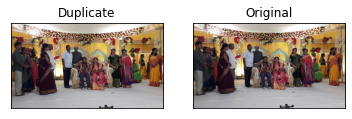

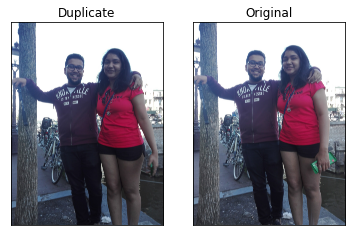

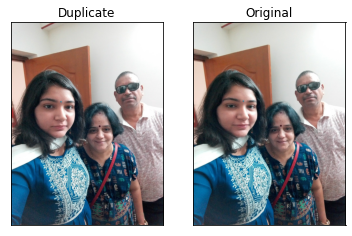

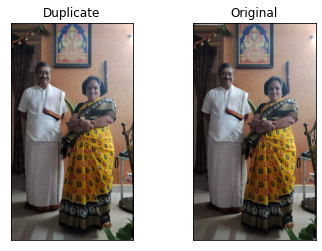

In [66]:
for file_names in similar[:31]:
    try:
    
        plt.subplot(121),plt.imshow(imread(file_names[0]))
        plt.title('Duplicate'), plt.xticks([]), plt.yticks([])

        plt.subplot(122),plt.imshow(imread(file_names[1]))
        plt.title('Original'), plt.xticks([]), plt.yticks([])
        plt.show()
    
    except OSError as e:
        continue